In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emails (1).csv")
df.head(20)

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,16,12,8,1,0,52,2,0,0,0,1,0,5,5,56,2,7,1,1,10,0,0,10,0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,9,4,6,2,0,27,1,0,0,0,0,0,7,1,40,0,0,0,0,11,1,5,2,0,6,1,2,4,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,2,6,2,0,0,28,1,0,1,0,0,5,1,0,23,0,1,0,0,2,0,0,5,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,3,3,2,1,0,15,0,1,0,0,0,0,3,2,6,0,0,0,0,0,0,0,3,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,9,4,1,0,0,35,10,0,2,1,1,0,3,1,37,0,1,1,0,4,2,1,4,2,4,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [33]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.00000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,10.935808,5.386118,1.388631,1.335267,45.857889,3.229312,0.924401,0.850928,0.804718,0.939675,0.814385,6.932328,1.978732,41.811872,1.408546,4.501160,0.657386,1.767208,4.807425,0.813998,0.617363,7.749033,0.838167,5.332367,0.734532,1.225251,0.538090,0.635151,0.627804,9.109049,...,0.005994,0.005607,0.004254,0.004254,0.004640,0.008701,0.005994,0.006381,0.008894,0.00406,0.004060,0.005414,0.070766,0.004060,0.008701,0.006187,0.005800,0.017208,0.006381,0.015855,0.005800,0.004640,0.006381,0.005027,0.006961,0.037510,0.008894,0.004060,0.005220,0.005607,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,17.999402,9.144407,2.849708,4.570525,77.832221,5.045836,2.084255,2.065738,1.444839,2.036278,2.001731,12.949766,3.719254,66.530032,2.583277,8.377237,1.247460,11.002626,7.568755,1.657193,1.844452,12.538043,1.771383,8.256332,1.930954,2.375526,1.945471,1.516908,1.130827,14.494729,...,0.118664,0.077224,0.073462,0.070781,0.067969,0.210261,0.077195,0.123437,0.110895,0.08675,0.066569,0.080906,0.367953,0.066569,0.132372,0.087733,0.100112,0.191417,0.097135,0.140928,0.133259,0.073439,0.097135,0.073413,0.162025,0.239546,0.099885,0.066569,0.084428,0.192108,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000

In [34]:
df.corr()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,0.731607,0.803790,0.734221,0.200423,0.818990,0.743079,0.767052,0.563711,0.624581,0.753228,0.314192,0.811642,0.703162,0.838884,0.714561,0.817035,0.615609,0.230444,0.762845,0.643787,0.332340,0.784939,0.700452,0.769754,0.238566,0.596343,0.202855,0.004187,0.347385,0.845925,...,0.022498,0.033352,0.170097,0.077908,0.134843,0.062896,0.160856,0.070278,0.254125,0.018895,0.153984,0.187651,0.217503,0.045152,0.080873,0.103316,0.047825,0.079136,0.066933,0.145515,0.070649,0.103275,0.120329,0.205072,0.113811,0.107622,0.099324,0.116635,-0.001618,0.018378,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,0.839835,0.859470,0.728995,0.236351,0.897928,0.817356,0.684976,0.536891,0.583980,0.735042,0.376937,0.857951,0.682258,0.912516,0.714609,0.857880,0.624210,0.305178,0.817480,0.654231,0.341765,0.881258,0.665764,0.819236,0.221384,0.630559,0.195922,0.029831,0.371280,0.891558,...,0.050109,0.047945,0.155680,0.067014,0.109662,0.198189,0.128001,0.080316,0.229054,0.028068,0.141085,0.169652,0.219617,0.038101,0.079605,0.123679,0.052748,0.128451,0.059885,0.118818,0.080723,0.085475,0.106867,0.214423,0.158259,0.162019,0.120079,0.105437,-0.004343,0.020223,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,0.505063,0.385887,0.288408,0.668960,0.331548,0.420845,0.276266,0.283387,0.276757,0.229789,0.060380,0.316540,0.346228,0.373317,0.310674,0.290970,0.432866,0.056972,0.400830,0.359378,0.328761,0.433256,0.270017,0.464133,0.269848,0.305465,0.351187,0.116776,0.319573,0.369748,...,-0.006641,-0.000563,0.018824,0.004231,0.069722,0.018623,0.021593,-0.001527,0.037890,0.006162,0.020803,0.055085,0.090881,0.009060,0.027613,0.316604,0.006121,0.041784,-0.006741,0.001966,-0.001885,0.119805,0.006530,0.029377,0.011581,0.027257,0.020236,0.044289,0.011714,0.018263,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,0.751678,0.795315,0.699667,0.192796,0.855299,0.736971,0.653001,0.530782,0.531632,0.767693,0.360467,0.811550,0.652071,0.860236,0.675722,0.828775,0.556739,0.318568,0.740626,0.560929,0.262651,0.801537,0.617394,0.752345,0.135961,0.535804,0.134203,-0.025775,0.297493,0.843892,...,0.041957,0.029743,0.174745,0.110416,0.140326,0.087867,0.173886,0.102486,0.289740,0.021537,0.157320,0.208301,0.209094,0.042482,0.079160,0.074951,0.026114,0.114008,0.062074,0.123198,0.089707,0.071510,0.125957,0.263175,0.126400,0.140115,0.071578,0.160684,-0.012139,0.020448,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,0.715465,0.754241,0.706979,0.230163,0.751743,0.692902,0.617378,0.446210,0.533637,0.682350,0.359309,0.748789,0.578599,0.783422,0.652008,0.719323,0.625723,0.234089,0.731349,0.617342,0.350456,0.844868,0.636241,0.764626,0.266059,0.516094,0.292207,0.062928,0.426903,0.795953,...,0.013626,0.023212,0.173934,0.088877,0.100913,0.095774,0.118358,0.068579,0.212097,0.017804,0.121888,0.136101,0.238543,0.030649,0.059738,0.113030,0.022393,0.058690,0.039935,0.092285,0.050309,0.140656,0.089702,0.229487,0.101367,0.157442,0.0

In [35]:
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,6,1,0,0,20,1,0,0,1,0,0,3,0,18,1,5,0,0,2,2,0,1,0,3,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,18,6,3,1,98,10,6,2,2,6,1,11,15,101,2,12,1,3,25,3,5,14,7,14,0,3,0,0,1,17,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,1,3,1,0,10,0,0,0,0,0,0,1,0,11,0,1,0,0,1,0,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,11,7,1,0,39,1,0,0,0,2,1,3,3,37,0,8,0,4,5,1,0,5,0,3,1,1,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0])

In [37]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25)

In [39]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         .
svc.fit(train_x,train_y)
y_pred2 = svc.predict(test_x)
svm = accuracy_score(y_pred2,test_y)
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,test_y))

Accuracy Score for SVC :  0.9010054137664346


In [40]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(train_x,train_y)
y_pred3 = rfc.predict(test_x)
RM =  accuracy_score(y_pred3,test_y)

print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred3,test_y))

Accuracy Score of Random Forest Classifier :  0.9729311678267595


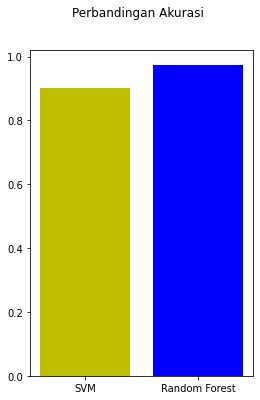

In [41]:
import matplotlib.pyplot as plt
names = ['SVM', 'Random Forest']
values = [svm, RM]
plt.figure(figsize=(4, 6))
plt.bar(names, values, color = ['y','b'])
plt.suptitle('Perbandingan Akurasi')
plt.show()